Importing all the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

In [5]:
df = pd.read_csv('water quality prediction.csv')

In [7]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [15]:
## Missing values
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [19]:
## date is of Object data type, change it to the date data type
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [21]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2861 entries, 0 to 2860
Series name: date
Non-Null Count  Dtype         
--------------  -----         
2861 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.5 KB


In [23]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [25]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [27]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [31]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [33]:
## Let's handle the missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [35]:
## check the missing values
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64

As there are no missing or null values in the dataframe.
And now we can process to further steps.

In [40]:
pollutants = ['NH4', 'BSK5', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

## Exploratory Data Analysis

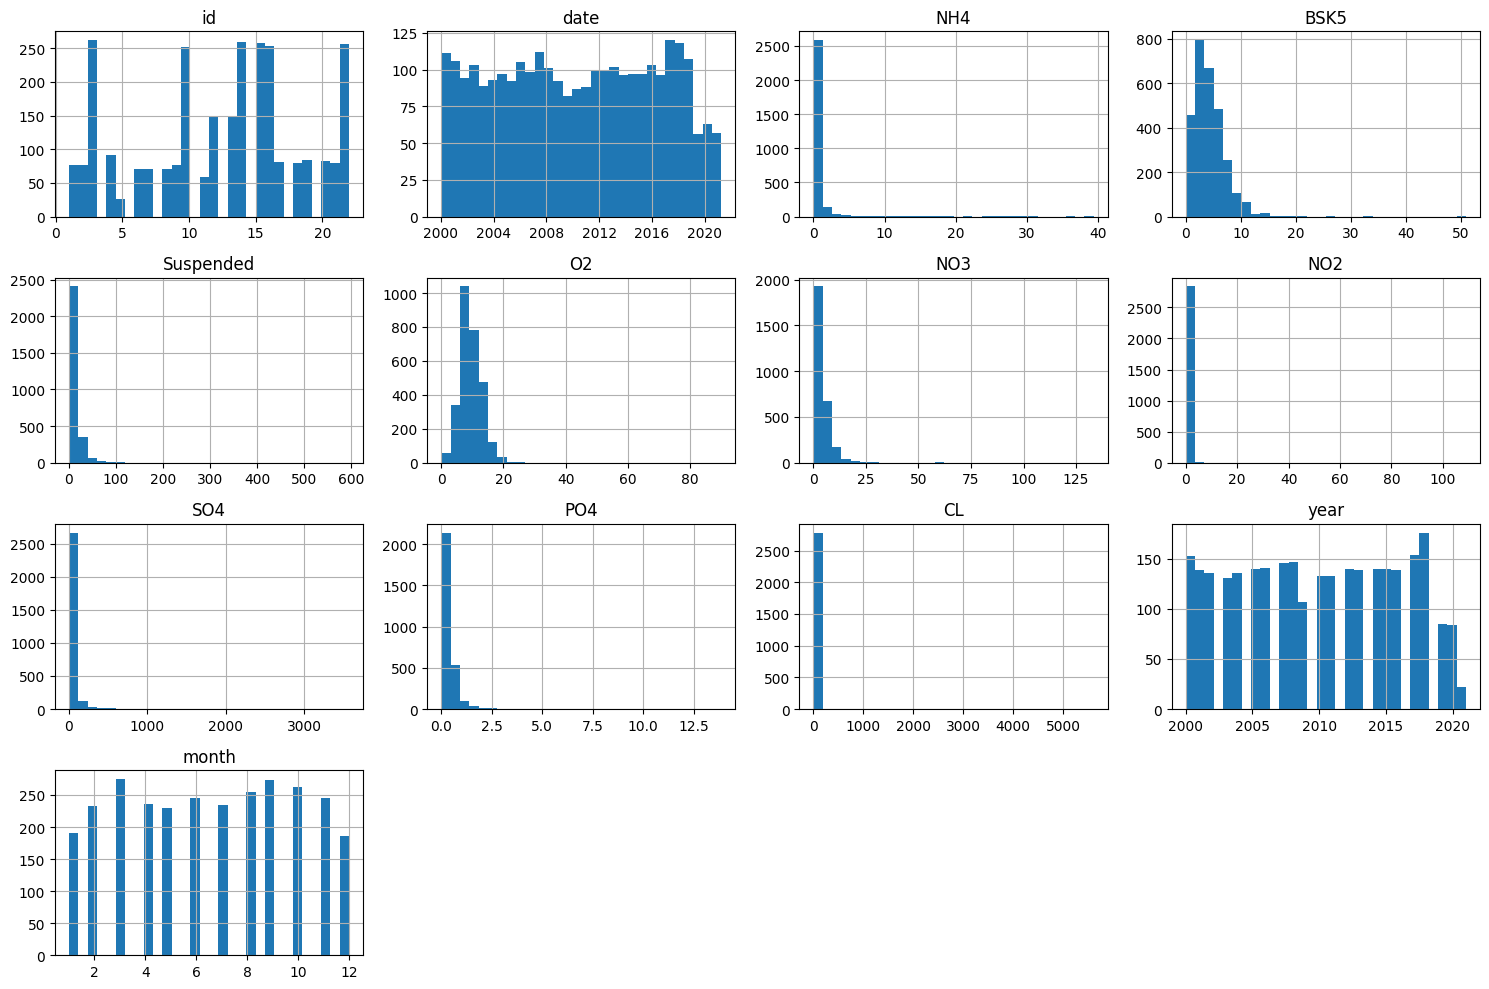

In [42]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

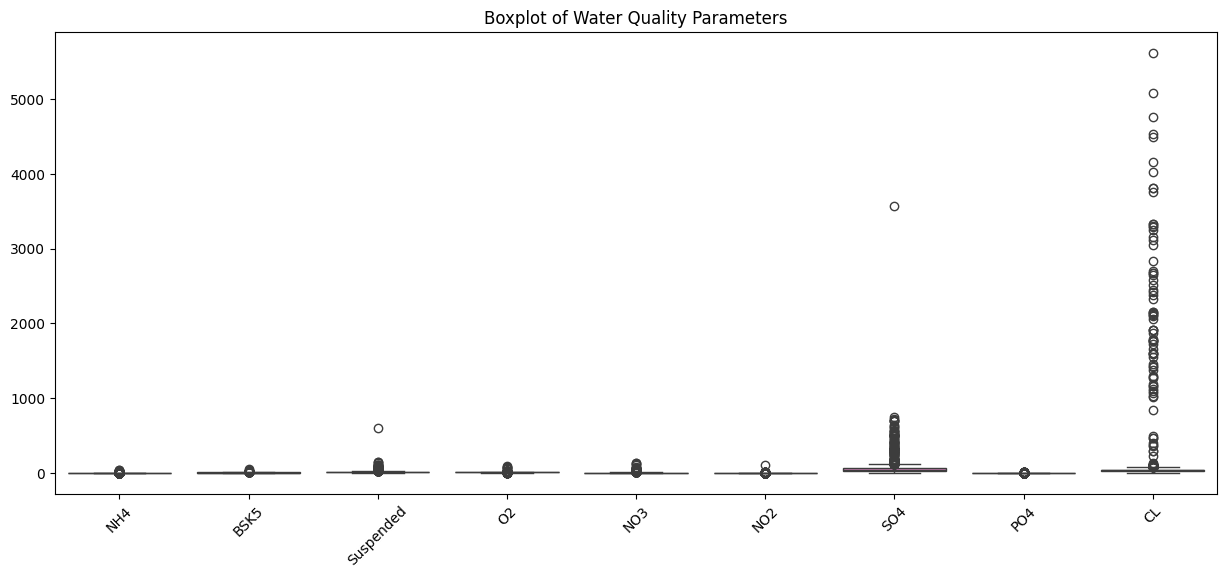

In [44]:
# detect the outliers using the Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']])
plt.xticks(rotation=45)
plt.title('Boxplot of Water Quality Parameters')
plt.show()

As see there are lot of outliers are present in the chlorine(CL).

## Plot the pollutants over time

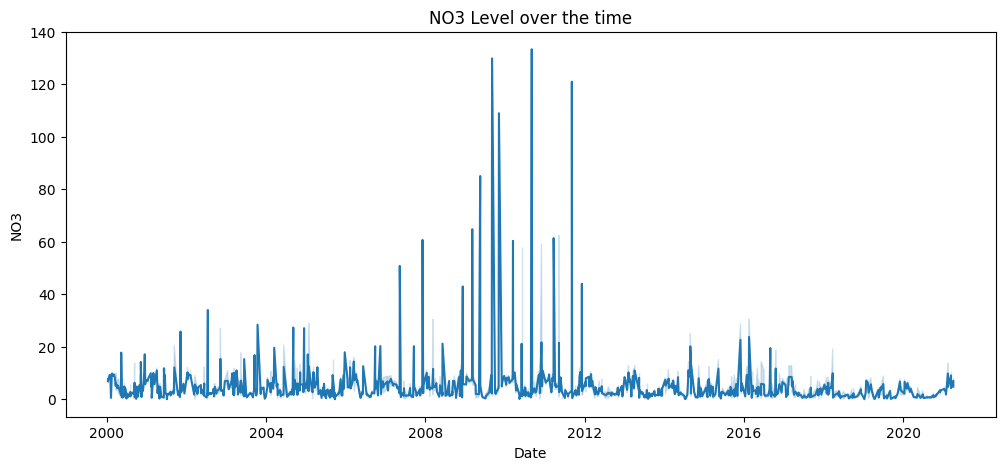

In [50]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='date', y='NO3')
plt.title('NO3 Level over the time')
plt.xlabel('Date')
plt.ylabel('NO3')
plt.show()

As seen in the diagram it sees that Nitrate (NO3) levelis high in the time period 2008 to 2012.

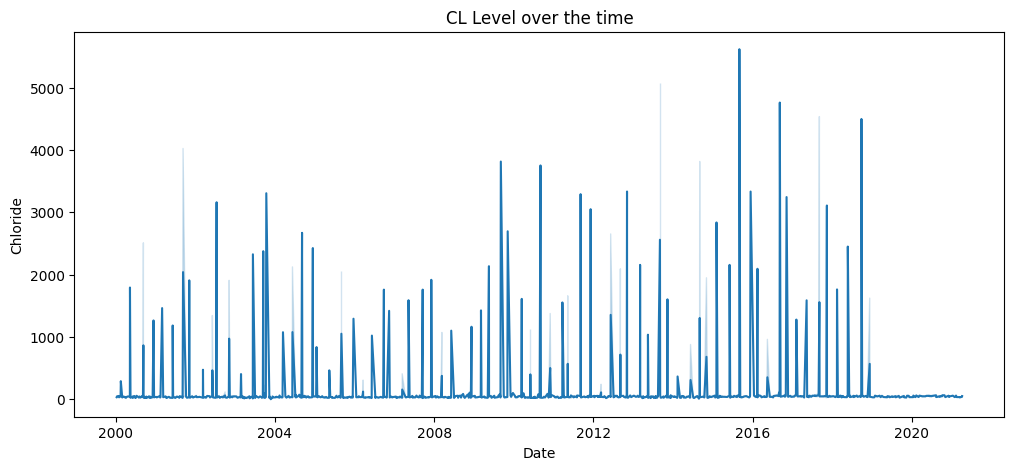

In [54]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='date', y='CL')
plt.title('CL Level over the time')
plt.xlabel('Date')
plt.ylabel('Chloride')
plt.show()

### Correlation Heatmap

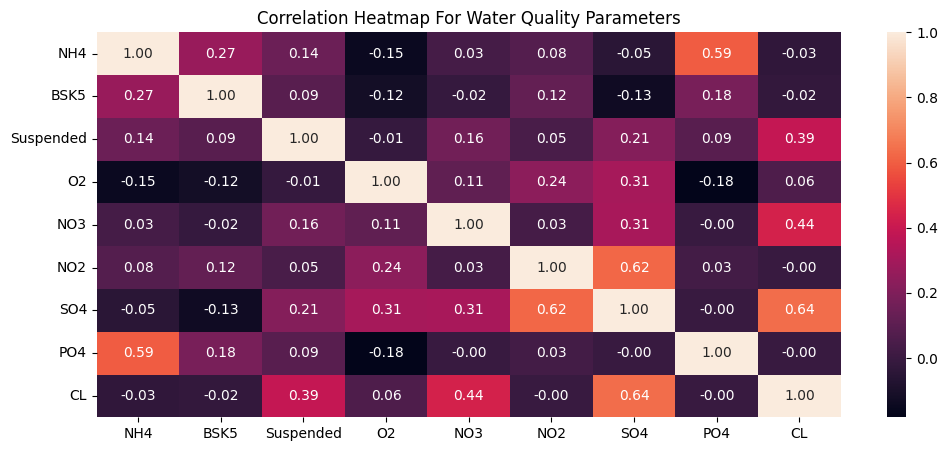

In [61]:
plt.figure(figsize=(12, 5))
sns.heatmap(data=df[['NH4','BSK5','Suspended','O2','NO3','NO2','SO4','PO4','CL']].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap For Water Quality Parameters')
plt.show()

The correlation heatmap shows how different water quality parameters are related to each other.

NH4 (Ammonium) is positively correlated with PO4 (Phosphate) (0.59).

SO4 (Sulfate) and CL (Chloride) have a strong positive correlation (0.64).

NO2 (Nitrite) also shows a strong correlation with SO4 (0.62).

Weak negative correlations (e.g., between O2 and NH4).